In [34]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import warnings
warnings.filterwarnings('ignore')

class StockDataAnalyzer:
    def fetch_stock_data(self, ticker, start_date, end_date):
        try:
            data = yf.download(ticker, start=start_date, end=end_date)
            if data.empty:
                print(f"No data found for {ticker}.")
                return None
            return data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
            return None

    def calculate_sma(self, data, window):
        return data['Close'].rolling(window=window).mean()

    def calculate_ema(self, data, window):
        return data['Close'].ewm(span=window, adjust=False).mean()

    def calculate_roi(self, data):
        return ((data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0]) * 100

    def plot_stock_data_with_sma_ema(self, data, ticker, sma_window=30, ema_window=30):
        if data is None:
            print(f"No data to plot for {ticker}")
            return
        sma = self.calculate_sma(data, sma_window)
        ema = self.calculate_ema(data, ema_window)
        plt.figure(figsize=(14, 7))
        plt.plot(data['Close'], label='Close Price')
        plt.plot(sma, label=f'{sma_window}-Day SMA', linestyle='--')
        plt.plot(ema, label=f'{ema_window}-Day EMA', linestyle=':')
        plt.title(f'{ticker} Stock Prices with SMA and EMA')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    def plot_volume(self, data, ticker):
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.fill_between(data.index, data['Volume'], 0)
        ax1.set_ylabel('Volume')
        ax2.plot(data['Close'], 'g-')
        plt.title(f'{ticker} Volume and Close Price')
        plt.show()

    def plot_candlestick(self, data, ticker):
        fig, ax = plt.subplots()
        data['Date'] = mdates.date2num(data.index.to_pydatetime())
        for idx, row in data.iterrows():
            color = 'g' if row['Close'] > row['Open'] else 'r'
            ax.plot([idx, idx], [row['Low'], row['High']], color='black')
            ax.plot([idx, idx], [row['Open'], row['Close']], color=color, linewidth=2)
        ax.xaxis_date()
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        fig.autofmt_xdate()
        plt.title(f'{ticker} Candlestick Chart')
        plt.show()

    def calculate_macd(self, data):
        exp1 = data['Close'].ewm(span=12, adjust=False).mean()
        exp2 = data['Close'].ewm(span=26, adjust=False).mean()
        macd = exp1 - exp2
        signal = macd.ewm(span=9, adjust=False).mean()
        return macd, signal

    def plot_macd(self, data, ticker):
        macd, signal = self.calculate_macd(data)
        plt.figure(figsize=(12, 4))
        plt.plot(data.index, macd, label='MACD', color='blue')
        plt.plot(data.index, signal, label='Signal Line', color='red')
        plt.legend(loc='upper left')
        plt.title(f'{ticker} MACD Chart')
        plt.show()

    def calculate_rsi(self, data, window=14):
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        
    def plot_rsi(data, ticker, window=14):
        
        rsi = calculate_rsi(data, window)
        plt.figure(figsize=(14, 4))
        plt.plot(data.index, rsi, label='RSI')
        plt.axhline(70, color='red', linestyle='--', label='Overbought Threshold (70)')
        plt.axhline(30, color='green', linestyle='--', label='Oversold Threshold (30)')
        plt.ylim(0, 100)
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.title(f'{ticker} RSI (Window: {window} days)')
        plt.legend()
        plt.show()

Enter the stock ticker (e.g., AAPL): AAPL
Enter the start date for data retrieval (YYYY-MM-DD): 2022-01-01
Enter the end date for data retrieval (YYYY-MM-DD): 2023-01-01
[*********************100%%**********************]  1 of 1 completed
Enter the number of days back to calculate ROI: 75
ROI for the past 75 days: -14.727310599536136%


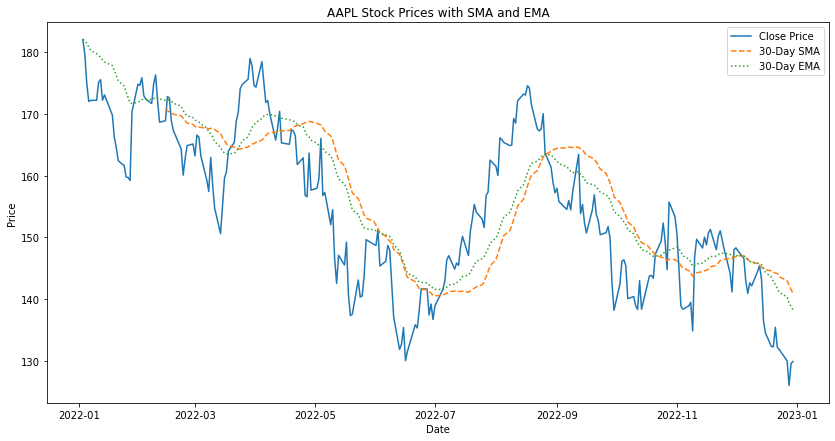

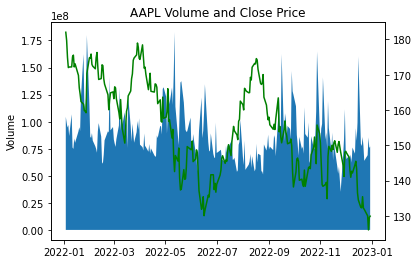

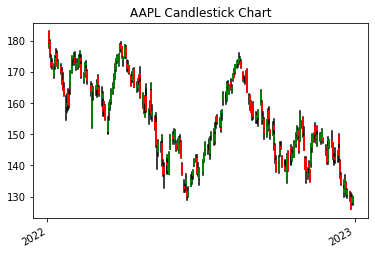

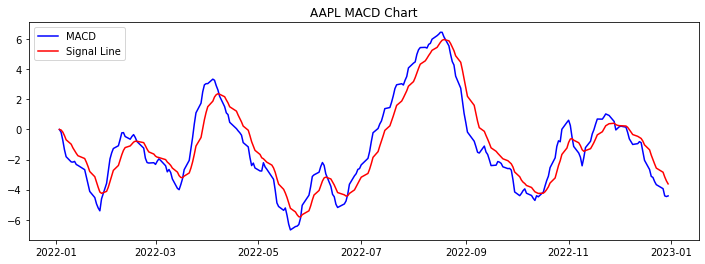

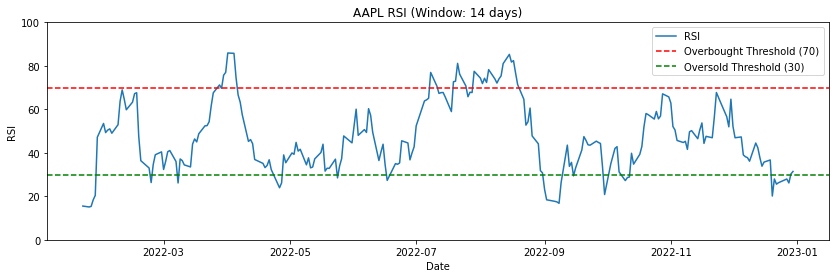

In [35]:
if __name__ == "__main__":
    
    analyzer =StockDataAnalyzer()
    ticker = input("Enter the stock ticker (e.g., AAPL): ")
    start_date = input("Enter the start date for data retrieval (YYYY-MM-DD): ")
    end_date = input("Enter the end date for data retrieval (YYYY-MM-DD): ")
    
    data = analyzer.fetch_stock_data(ticker, start_date, end_date)
    if data is not None:
        
        roi_days = int(input("Enter the number of days back to calculate ROI: "))
        roi_data = data[-roi_days:]  
        roi = calculate_roi(roi_data)
        print(f"ROI for the past {roi_days} days: {roi}%")
        
        plot_stock_data_with_sma_ema(data, ticker)
        plot_volume(data, ticker)
        plot_candlestick(data, ticker)
        plot_macd(data, ticker)
        plot_rsi(data, ticker)
    else:
        print("Failed to retrieve data.")